# Creating a Neural Network with Python and Pytorch






# Tensors
Tensors are the fundamental building blocks in PyTorch, their job is to represent data in a numerical way.

A tensor is a multi-dimensional array of numbers, used to represent data in a way that computers can understand and process. It's like a more powerful version of a matrix, able to handle not just 2D data (like images in black and white) but also data with more dimensions, like color images or 3D shapes.

In general, tensors are like NumPy arrays in how they store data, but they offer more flexibility for things like GPU processing, which is important for deep learning tasks.

# Data
 We'll use torchvision to load the MNIST dataset, which is a image-based dataset showing handwritten digits from 0-9.

  * We load the MNIST dataset using torchvision.datasets.MNIST.

  * the training set (60,000 images).
  * the test set (10,000 images)

 Then :
     * Convert the image into a PyTorch tensor.
     * Normalize the pixel values from the range [0, 255] (typical for images) to [0, 1] by dividing each pixel by 255, making it easier to work with in neural networks.

**scaling/normalization of the dataset**

In general, we want all input data to be between zero and one. Often many datasets will contain data in ranges that are not within this range, and we generally will want to come up with a way to scale the data to be within this range.

For example, an image is comprised of pixel values, most often in the range of 0 to 255. To scale image data, you usually just divide by 255. That's it. Even though all features are just pixels, and all you do is divide by 255 before passing to the neural network, this makes a huge difference.

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 37.8MB/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.14MB/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.58MB/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.14MB/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



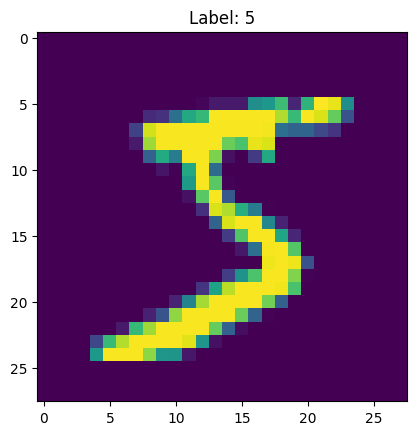

In [2]:
import matplotlib.pyplot as plt

image, label = train[0]

plt.imshow(image.squeeze())
plt.title(f"Label: {label}")
plt.show()


# DataLoader

We'll use torch.utils.data.DataLoader to load the MNIST dataset for training and testing in batches.

trainset loads the training data with shuffle=True, meaning the data will be shuffled (randomized) at the start of each training epoch to ensure the model doesn’t learn from any patterns in the order of the data.

testset loads the testing data with shuffle=False, meaning the data is not shuffled because the model is only evaluated after training, and we want consistent results.

batch_size=10 indicates that the data will be divided into batches of 10 images at a time for processing. This helps in training the model efficiently by processing smaller portions of data instead of the whole dataset at once.



In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

**Why shuffling :**

We generally want to randomly shuffle the input data as much as possible to hopefully not have any patterns in the data that might throw the machine off.

For example, if you fed the machine a bunch of images of zeros, the machine would learn to classify everything as zero. Then you'd start feeding it ones, and the machine would figure out pretty quick to classify everything as ones...and so on. Whenever you stop, the machine would probably just classify everything as the last thing you trained on. If you shuffle the data, your machine is much more likely to figure out what's.

**Why batches**

In practice, we don't feed the entire dataset into a neural network at once for two main reasons:

* Memory Limitations: Neural networks, especially when dealing with large datasets, can exceed the memory of your GPU or RAM. So, we divide the data into smaller batches that can fit into memory.

* Avoiding Memorization: Neural networks can have millions of parameters, which means they could memorize the data instead of learning general patterns. By using smaller batches, the network learns more effectively by updating weights with each batch, ensuring it focuses on generalizing, not memorizing.

Using small batches forces the network to focus on learning useful patterns and avoid overfitting to the data. A smaller network that generalizes well is typically more successful long-term.

# Loop
data is a tuple containing two elements: the images and their corresponding labels.
* The first element (data[0]) contains the images in the form of tensors.
* The second element (data[1]) contains the labels (the digits the images represent).

In [4]:
for data in trainset:  #The for data in trainset: loop goes through the batches of data.
    print(data)
    break   #only the first batch is printed

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

(batch_size, channels, height, width)

**Tensor of Images (data[0])**

* This is a 4-dimensional tensor, where each element represents an image in the batch.
* The shape of the tensor is (batch_size, channels, height, width).
* Each number in the tensor represents the pixel values of the images. Since the images have been transformed ToTensor, pixel values range from 0 to 1 (after normalization).


**Tensor of Labels (data[1])**

* This tensor contains the labels corresponding to the images in the batch.
* Each value represents the correct digit for the corresponding image.


In [5]:
X, y = data[0][0], data[1][0]

In [6]:
print(X)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [7]:
print(y)

tensor(1)


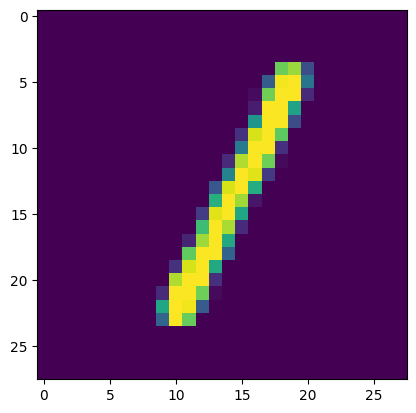

In [8]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

# Balancing data
What is Data Balancing?

Data balancing ensures that each class in our dataset has an equal number of examples. Without balancing, a model may simply predict the majority class. For example, if we have 7,200 dog images and only 1,800 cat images, the model could easily predict "dog" for most cases, achieving 72% accuracy without truly learning to distinguish between the classes.

Balancing the data helps the model learn better by making sure each class is represented equally.

In [9]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1 #increases by 1 the value associated with the key corresponding to y in counter_dict, thus counting each occurrence of the label.
        total += 1 #total number of labels in trainset

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


**Results**

The code shows that the classes in the dataset are not perfectly balanced, but the distribution is fairly close. Class 1 (with 6,742 examples) is the most represented, while class 5 (with 5,421 examples) is the least represented. Each class represents about 9 to 11% of the total data. This should be acceptable.


## Create the NN model

 To begin, we're going to make some imports from Pytorch:

 * The torch.nn import gives us access to some helpful neural network things, such as various neural network layer types (things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc). For us, we only needt fully-connected layers.

* The torch.nn.functional area specifically gives us access to some handy functions that we might not want to write ourselves. We will be using the relu  activation function for our neurons.

In [10]:
import torch.nn as nn
import torch.nn.functional as F

# Define the Neural Network Architecture
The architecture of the neural network is defined by creating a class that inherits from nn.Module, which is the base class for all neural network modules in PyTorch. This allows the class to use PyTorch’s built-in functionalities for neural networks.


***\__init__ Method (Constructor)***


**The four fully connected (or "dense") layers in the network**
* **self.fc1** is a linear layer that takes an input of size 28*28 (784).
* **self.fc2** and **self.fc3** are linear layers that take an input of 64 features (from the previous layer) and output 64 features.
* **self.fc4** is a linear layer that takes 64 features as input and outputs 10 features, corresponding to 10 classes for classification.

***forward Method***

This method defines how the data flows through the network layers. PyTorch automatically calls this method when you pass data through the network.

The input x is passed through each layer sequentially:
* self.fc1(x): The input is passed through the first linear layer, and F.relu applies the ReLU activation function to add non-linearity to the network.
* This process is repeated for fc2 and fc3, with ReLU activation after each.
* self.fc4(x): The last layer does not have ReLU activation, as it's often preferable to leave the final output layer as-is for classification.

In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net() #This line creates an instance of the Net class, initializing the model with the defined layers.
print(net) #This line prints the architecture of the network, showing each layer and its configuration.

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


•	ReLU Activation : Rectified Linear Unit : is a non-linear activation function that is used in multi-layer neural networks or deep neural networks.

 the output of ReLu is the maximum value between zero and the input value. An output is equal to zero when the input value is negative and the input value when the input is positive.

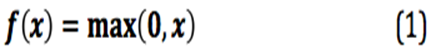
    

Softmax function : a function that converts input values to 0–1 values that sum up to 1.

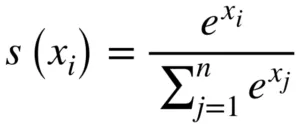

# Calculate loss and specify our optimizer
**Importing the Optimizer**

PyTorch provides various optimization algorithms in the torch.optim module to adjust model weights during training.

**Defining the Loss Function**

* The loss_function calculates how well the model predictions match the target labels.
* nn.CrossEntropyLoss() is commonly used in classification tasks where classes are mutually exclusive.

**Optimizer**

* The optimizer is responsible for updating model weights to minimize the loss.
* optim.Adam is a widely-used optimizer known for its adaptive learning rate, which speeds up convergence.


In [12]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)  #lr :determines the step size for each weight update.

#  Train the neural network model
In this code, we’ll go through 3 epochs, meaning you’ll pass through the dataset 3 times.

This code trains the model,
So, for each epoch, and for each batch in our dataset, we :

* Grab the features (X) and labels (y) from current batch
* Zero the gradients (net.zero_grad)
* Pass the data through the network
* Calculate the loss
* Adjust weights in the network with the hopes of decreasing loss

The goal is to minimize the loss as the epochs progress, improving the model’s performance on the dataset.

In [13]:
for epoch in range(3): #  3 epochs
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc.It’s crucial to clear previous gradients because, by default, PyTorch accumulates gradients. This would otherwise lead to incorrect weight updates.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss.

tensor(0.3951, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0642, grad_fn=<NllLossBackward0>)


# Accuracy

To evaluate accuracy, we use our test set and compare the model’s predictions to the actual target values.

This code computes the model's accuracy on the test set by:

* Passing each batch through the model and getting predictions.
* Comparing each prediction with the actual label.
* Counting correct predictions and dividing by the total to get the accuracy.

This gives a good measure of the model's performance on unseen data, which helps determine how well the model generalizes.


In [14]:
correct = 0 # Keeps a count of the correctly predicted labels.
total = 0 # Keeps a count of all the labels in the test set, allowing us to calculate accuracy as a ratio.

with torch.no_grad(): # This makes the code faster and reduces memory usage since we don’t need gradients for testing/evaluation (we’re not updating any weights).
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.969


# Evaluate the model

Here, X[0] represents the first simage from the batch .

* Reshape the image from its 2D (28x28) format into a 1D vector with 784 elements, making it suitable for the input layer of the neural network.
*  Pass the reshaped image through the network, which returns an output tensor with 10 values, representing the model's confidence in each of the 10 possible classes (for instance, digits 0-9).
* torch.argmax(): argmax finds the index of the highest value in the output, which corresponds to the model’s predicted class. The output is tensor(7), meaning the model predicts this image belongs to class 7.

In [15]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(7)


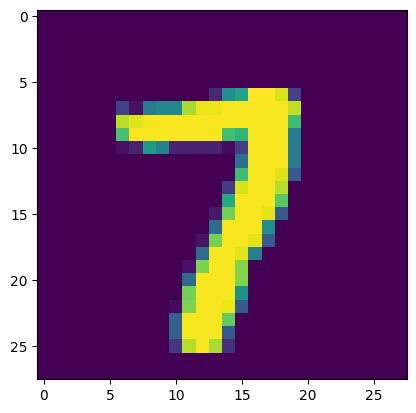

In [16]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [17]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1,784) # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) # Passes the reshaped image through the network.
first_pred = output[0] #contains the prediction scores for each class for the first sample.
print(first_pred)

tensor([-3.0453e+01, -1.3103e+01, -1.3306e+01, -1.2216e+01, -2.0251e+01,
        -1.8845e+01, -4.4081e+01, -9.1791e-06, -1.7467e+01, -1.4674e+01],
       grad_fn=<SelectBackward0>)


Each value represents the score for each class (0 through 9). Higher values indicate higher confidence for a particular class.

In [18]:
biggest_index = torch.argmax(first_pred)
print(biggest_index)

tensor(7)
